# Task

Scrape data from the web

The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.

The team leader wants you to focus on reviews specifically about the airline itself. You should collect as much data as you can in order to improve the output of your analysis. To get started with the data collection, you can use the “Jupyter Notebook” in the Resources section below to run some Python code that will help to collect some data. 

Analyse data

Once you have your dataset, you need to prepare it. The data will be very messy and contain purely text. You will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, you should perform your own analysis to uncover some insights. As a starting point, you could look at topic modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews. It is recommended to complete this task using Python, however, you can use any tool that you wish. You can use some of the documentation websites provided in the Resources section below to analyse the data.

Please ensure that you have created a folder called "data" and mapped your file path.

Present insights

Your manager would like you to summarise your findings within a single PowerPoint slide, so that they can present the results at the next board meeting. You should create visualisations and metrics to include within this slide, as well as clear and concise explanations in order to quickly provide the key points from your analysis. Use the “PowerPoint Template” provided to complete the slide

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
import matplotlib.pyplot as plt

In [2]:
url ='https://www.airlinequality.com/airline-reviews/british-airways'

### How to get the headers

Right click and then hit inspect on the webpage you are trying to get data from.

next, click on console, 

next in console, type navigator.userAgent

and then copy the link that shows up.

In [3]:
headers = {
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 Edg/116.0.1938.76'
}

In [4]:
r = requests.get(url, {'headers': headers})

In [5]:
soup = bs4.BeautifulSoup(r.text, 'html.parser')

In [6]:
review =soup.find_all('article', {'itemprop': 'review'})
review

[<article class="comp comp_media-review-rated list-item media position-content review-872803" itemprop="review" itemscope="" itemtype="http://schema.org/Review">
 <meta content="2023-09-16" itemprop="datePublished"/>
 <div class="rating-10" itemprop="reviewRating" itemscope="" itemtype="http://schema.org/Rating">
 <span itemprop="ratingValue">1</span>/<span itemprop="bestRating">10</span>
 </div>
 <div class="body" id="anchor872803">
 <h2 class="text_header">"the worst airline in the UK"</h2>
 <h3 class="text_sub_header userStatusWrapper">
 <span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
 <span itemprop="name">David Amory</span></span> (United Kingdom) <time datetime="2023-09-16" itemprop="datePublished">16th September 2023</time></h3>
 <div class="tc_mobile">
 <div class="text_content" itemprop="reviewBody"><strong><a href="https://www.airlinequality.com/verified-reviews/"><em>Not Verified</em></a></strong> |  British Airways has confirmed itself as the worst

In [7]:
rating = review[1].find('span').text
rating

'2'

In [8]:
title = review[1].find('h2').text
title

'"Worst BA experience"'

In [9]:
text = review[0].find('div',{'class': 'text_content'}).text
text

'Not Verified |  British Airways has confirmed itself as the worst airline in the UK. Last minute cancellation, no explanation, refusal to book with another airline “because we don’t have an arrangement with them”. What’s happened to what used to be our national airline?'

In [10]:
import pandas as pd

In [11]:
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways/page/{}/'

In [12]:
res = requests.get(base_url.format('1'))

In [13]:
soup2 = bs4.BeautifulSoup(res.text, 'html.parser')

In [14]:
def get_soup(url):
    r = requests.get(url, {'headers': headers})
    soup = bs4.BeautifulSoup(r.text, 'html.parser')
    return soup

In [15]:
data =[]

In [16]:
def get_reviews(soup):
    review =soup.find_all('article', {'itemprop': 'review'})
    try:
        for item in review:
            reviews = {
                'rating': item.find('span').text.strip(),
                'title': item.find('h2').text.strip(),
                'text': item.find('div',{'class': 'text_content'}).text.strip()
            }
            data.append(reviews)
    except:
        pass
    

In [17]:
for x in range(1,345):
    soup = get_soup(f'https://www.airlinequality.com/airline-reviews/british-airways/page/{x}/')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(data))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
40
Getting page: 5
50
Getting page: 6
60
Getting page: 7
70
Getting page: 8
80
Getting page: 9
90
Getting page: 10
100
Getting page: 11
110
Getting page: 12
120
Getting page: 13
130
Getting page: 14
140
Getting page: 15
150
Getting page: 16
160
Getting page: 17
170
Getting page: 18
180
Getting page: 19
190
Getting page: 20
200
Getting page: 21
210
Getting page: 22
220
Getting page: 23
230
Getting page: 24
240
Getting page: 25
250
Getting page: 26
260
Getting page: 27
270
Getting page: 28
280
Getting page: 29
290
Getting page: 30
300
Getting page: 31
310
Getting page: 32
320
Getting page: 33
330
Getting page: 34
340
Getting page: 35
350
Getting page: 36
360
Getting page: 37
370
Getting page: 38
380
Getting page: 39
390
Getting page: 40
400
Getting page: 41
410
Getting page: 42
420
Getting page: 43
430
Getting page: 44
440
Getting page: 45
450
Getting page: 46
460
Getting page: 47
470
Getting page: 48
480
Getting pa

In [18]:
df = pd.DataFrame(data, 
                 columns =['rating', 'title', 'text'])
df 

,rating,title,text
0,1,"""the worst airline in the UK""",Not Verified | British Airways has confirmed ...
1,2,"""Worst BA experience""",✅ Trip Verified | Worst BA experience. I was s...
2,1,"""the worst airline service""",✅ Trip Verified | My daughter and I were deni...
3,8,"""service on board was impeccable""",✅ Trip Verified | Despite boarding being the u...
4,1,"""a national disgrace""","Not Verified | Flight cancelled, no crew! 9th..."
...,...,...,...
3435,10,British Airways customer review,We flew from LHR to Luxembourg on an afternoon...
3436,2,British Airways customer review,We flew the A380 from LAX-LHR-JNB-LHR-LAX in A...
3437,8,British Airways customer review,My journey was from BOM to LHR (I had a connec...
3438,3,British Airways customer review,Sad to say BA missed a big opportunity when th...


In [19]:
df.shape

(3440, 3)

In [20]:
df.to_csv('britishAir_reviews.csv')

## check for null values

In [21]:
df.isnull().sum()

rating    0
title     0
text      0
dtype: int64

## let's rescale the rating values from 0 to 5

In [22]:
df['rating'].value_counts()

1                 821
2                 397
3                 381
8                 344
10                293
7                 292
9                 283
4                 241
5                 216
6                 170
Ray Desjardins      1
Neil Balter         1
Name: rating, dtype: int64

## Converting Dask DataFrame object columns to numbers with to_numeric

In [23]:
df["rating"] = pd.to_numeric(df["rating"], errors="coerce").astype('Int64')

In [24]:
df.dtypes

rating     Int64
title     object
text      object
dtype: object

In [25]:
df['rating'].value_counts()

1     821
2     397
3     381
8     344
10    293
7     292
9     283
4     241
5     216
6     170
Name: rating, dtype: Int64

In [26]:
df.head()

,rating,title,text
0,1,"""the worst airline in the UK""",Not Verified | British Airways has confirmed ...
1,2,"""Worst BA experience""",✅ Trip Verified | Worst BA experience. I was s...
2,1,"""the worst airline service""",✅ Trip Verified | My daughter and I were deni...
3,8,"""service on board was impeccable""",✅ Trip Verified | Despite boarding being the u...
4,1,"""a national disgrace""","Not Verified | Flight cancelled, no crew! 9th..."


In [27]:
df.text = df.text.str.lower()

In [28]:
df.isnull().sum()

rating    2
title     0
text      0
dtype: int64

In [29]:
df =df.dropna()

In [30]:
df.isnull().sum()

rating    0
title     0
text      0
dtype: int64

In [31]:
df['rating'] = df['rating']/2

In [32]:
df.head()

,rating,title,text
0,0.5,"""the worst airline in the UK""",not verified | british airways has confirmed ...
1,1.0,"""Worst BA experience""",✅ trip verified | worst ba experience. i was s...
2,0.5,"""the worst airline service""",✅ trip verified | my daughter and i were deni...
3,4.0,"""service on board was impeccable""",✅ trip verified | despite boarding being the u...
4,0.5,"""a national disgrace""","not verified | flight cancelled, no crew! 9th..."


In [33]:
df['rating'].value_counts()

0.5    821
1.0    397
1.5    381
4.0    344
5.0    293
3.5    292
4.5    283
2.0    241
2.5    216
3.0    170
Name: rating, dtype: Int64

In [34]:
def sentiments(rating):
    if (rating ==5) or (rating == 4.5):
        return 'positive'
    elif (rating == 4) or (rating == 3.5):
        return 'positive'
    elif rating == 3:
        return 'neutral'
        
    elif (rating == 2.5) or (rating == 2):
        return 'negative'
    elif (rating == 1.5) or (rating == 1):
        return 'negative'
    elif rating == 0.5:
        return 'negative'

In [35]:
data2 = df.copy()

In [36]:
data2["Sentiment"] = data2["rating"].apply(sentiments)

In [37]:
print(data2['Sentiment'])

0       negative
1       negative
2       negative
3       positive
4       negative
          ...   
3435    positive
3436    negative
3437    positive
3438    negative
3439    positive
Name: Sentiment, Length: 3438, dtype: object


In [38]:
data2

,rating,title,text,Sentiment
0,0.5,"""the worst airline in the UK""",not verified | british airways has confirmed ...,negative
1,1.0,"""Worst BA experience""",✅ trip verified | worst ba experience. i was s...,negative
2,0.5,"""the worst airline service""",✅ trip verified | my daughter and i were deni...,negative
3,4.0,"""service on board was impeccable""",✅ trip verified | despite boarding being the u...,positive
4,0.5,"""a national disgrace""","not verified | flight cancelled, no crew! 9th...",negative
...,...,...,...,...
3435,5.0,British Airways customer review,we flew from lhr to luxembourg on an afternoon...,positive
3436,1.0,British Airways customer review,we flew the a380 from lax-lhr-jnb-lhr-lax in a...,negative
3437,4.0,British Airways customer review,my journey was from bom to lhr (i had a connec...,positive
3438,1.5,British Airways customer review,sad to say ba missed a big opportunity when th...,negative


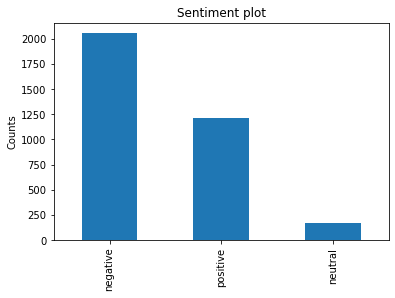

In [39]:
data2['Sentiment'].value_counts().plot(kind = 'bar', title = 'Sentiment plot')
plt.ylabel('Counts')
plt.show()

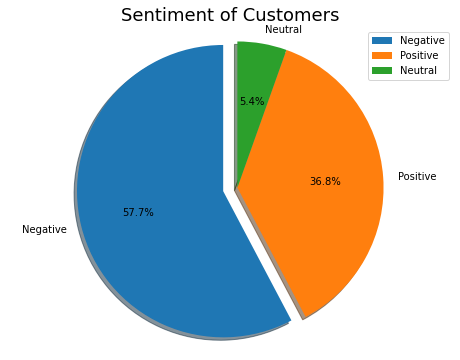

In [40]:
plt.figure(figsize = (8,6))
sentiment = ['Negative', 'Positive', 'Neutral']
counts = [1983,1265,187]
explode = (0.1, 0,0)

plt.pie(counts, explode=explode, labels=sentiment,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Sentiment of Customers', size = 18)
plt.legend(sentiment, loc="best")
plt.show()

In [41]:
data2['Sentiment'].value_counts()

negative    2056
positive    1212
neutral      170
Name: Sentiment, dtype: int64

# Sentiment analysis

In [42]:
review_df =data2[['text', 'Sentiment']]
review_df.head()

,text,Sentiment
0,not verified | british airways has confirmed ...,negative
1,✅ trip verified | worst ba experience. i was s...,negative
2,✅ trip verified | my daughter and i were deni...,negative
3,✅ trip verified | despite boarding being the u...,positive
4,"not verified | flight cancelled, no crew! 9th...",negative


Let's remove neutral sentiment and focus on both positive and negative sentiments

In [43]:
review_df = review_df[review_df['Sentiment'] != 'neutral']
print(review_df.shape)
review_df.head()

(3268, 2)


,text,Sentiment
0,not verified | british airways has confirmed ...,negative
1,✅ trip verified | worst ba experience. i was s...,negative
2,✅ trip verified | my daughter and i were deni...,negative
3,✅ trip verified | despite boarding being the u...,positive
4,"not verified | flight cancelled, no crew! 9th...",negative


In [44]:
review_df['Sentiment'].value_counts()

negative    2056
positive    1212
Name: Sentiment, dtype: int64

let's retrieve all text data from the dataset

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # for regex
from nltk.corpus import stopwords
import textblob
from textblob import Word
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\philippe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\philippe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# STEPS TO CLEAN THE REVIEWS :

1. Remove HTML tags

2. Remove special characters

3. Convert everything to lowercase

4. Remove stopwords
    
5. Stemming

## 1. Remove HTML tags

In [48]:
def clean(text):
    
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

In [49]:
review_df.text = review_df.text.apply(clean)
review_df.text[0]

'not verified |  british airways has confirmed itself as the worst airline in the uk. last minute cancellation, no explanation, refusal to book with another airline “because we don’t have an arrangement with them”. what’s happened to what used to be our national airline?'

## 2. Remove special characters

In [50]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

In [51]:
review_df.text = review_df.text.apply(is_special)
review_df.text[0]

'not verified    british airways has confirmed itself as the worst airline in the uk  last minute cancellation  no explanation  refusal to book with another airline  because we don t have an arrangement with them   what s happened to what used to be our national airline '

## 3. Convert everything to lowercase

In [52]:
def to_lower(text):
    text = text.lower()
    return text

In [53]:
review_df.text = review_df.text.apply(to_lower)
review_df.text[0]

'not verified    british airways has confirmed itself as the worst airline in the uk  last minute cancellation  no explanation  refusal to book with another airline  because we don t have an arrangement with them   what s happened to what used to be our national airline '

## 4. Remove stopwords

In [54]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

In [55]:
review_df.text = review_df.text.apply(rem_stopwords)
review_df.text[0]

['verified',
 'british',
 'airways',
 'confirmed',
 'worst',
 'airline',
 'uk',
 'last',
 'minute',
 'cancellation',
 'explanation',
 'refusal',
 'book',
 'another',
 'airline',
 'arrangement',
 'happened',
 'used',
 'national',
 'airline']

In [56]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\philippe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
review_df['sent_sum'] = review_df.Sentiment.replace({'negative' : '0', 'positive': 1})

In [58]:
review_df.head()

,text,Sentiment,sent_sum
0,"[verified, british, airways, confirmed, worst,...",negative,0
1,"[trip, verified, worst, ba, experience, suppos...",negative,0
2,"[trip, verified, daughter, denied, boarding, b...",negative,0
3,"[trip, verified, despite, boarding, usual, fre...",positive,1
4,"[verified, flight, cancelled, crew, 9th, septe...",negative,0


In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## wordcloud Function

In [60]:
# wordcloud function



def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud

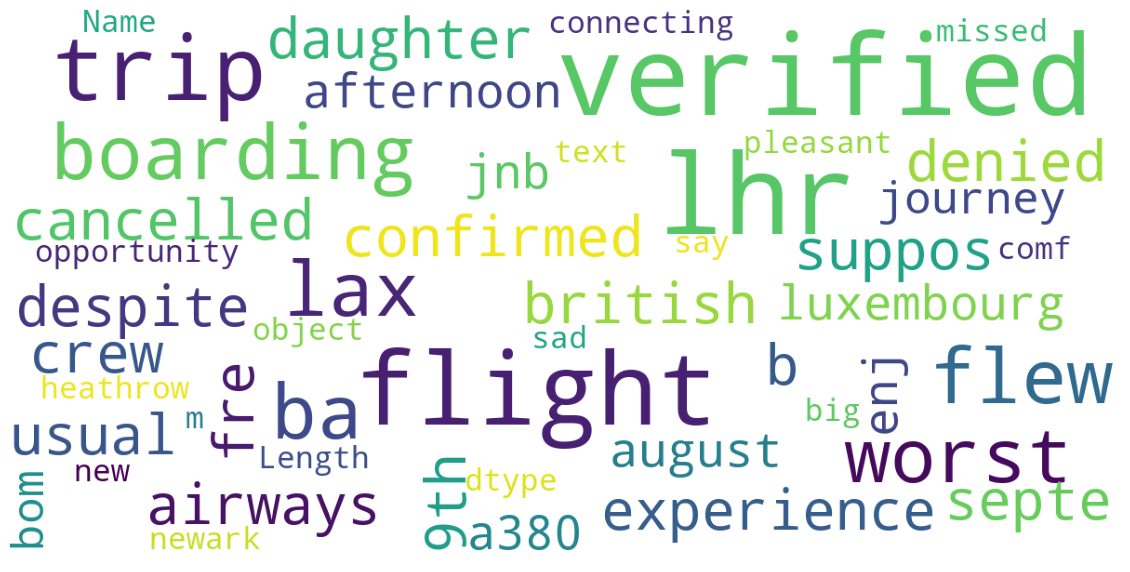

In [61]:
show_wordcloud(review_df["text"])

## 5. Stem the words

In [62]:
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

In [63]:
review_df.text = review_df.text.apply(stem_txt)
review_df.text[0]

'verifi british airway confirm worst airlin uk last minut cancel explan refus book anoth airlin arrang happen use nation airlin'

## let's create the model and import relevant libraries

In [64]:
review_df.head()

,text,Sentiment,sent_sum
0,verifi british airway confirm worst airlin uk ...,negative,0
1,trip verifi worst ba experi suppos fli itali 7...,negative,0
2,trip verifi daughter deni board busi class fli...,negative,0
3,trip verifi despit board usual free lhr group ...,positive,1
4,verifi flight cancel crew 9th septemb 2023 pea...,negative,0


In [65]:
sentiment_label = review_df.Sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 Index(['negative', 'positive'], dtype='object'))

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


First, retrieve all the text data from the dataset and  tokenize all the words in the text with the help of Tokenizer

In [67]:
tweet = review_df.text.values
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)


In [68]:
print(tokenizer.word_index)

{'flight': 1, 'seat': 2, 'ba': 3, 'servic': 4, 'time': 5, 'london': 6, 'food': 7, 'verifi': 8, 'british': 9, 'airway': 10, 'crew': 11, 'good': 12, 'cabin': 13, 'class': 14, 'hour': 15, 'airlin': 16, 'trip': 17, 'busi': 18, 'board': 19, 'check': 20, 'one': 21, 'get': 22, 'staff': 23, 'heathrow': 24, 'fli': 25, 'would': 26, 'economi': 27, 'first': 28, 'passeng': 29, 'offer': 30, 'return': 31, 'drink': 32, 'meal': 33, 'plane': 34, 'us': 35, 'arriv': 36, 'travel': 37, 'even': 38, 'book': 39, 'back': 40, 'use': 41, 'club': 42, 'custom': 43, 'loung': 44, 'review': 45, 'delay': 46, 'could': 47, 'experi': 48, 'serv': 49, 'lhr': 50, 'day': 51, 'bag': 52, 'new': 53, 'like': 54, 'aircraft': 55, 'ask': 56, 'comfort': 57, '2': 58, 'told': 59, 'call': 60, 'minut': 61, 'go': 62, 'airport': 63, 'long': 64, '3': 65, 'realli': 66, 'take': 67, 'well': 68, 'way': 69, 'year': 70, 'friend': 71, 'premium': 72, 'got': 73, 'pay': 74, 'choic': 75, 'leg': 76, 'better': 77, 'much': 78, 'world': 79, 'great': 80, '

In [69]:
print(tweet[0])
print(encoded_docs[0])

verifi british airway confirm worst airlin uk last minut cancel explan refus book anoth airlin arrang happen use nation airlin
[8, 9, 10, 588, 233, 16, 458, 95, 61, 102, 701, 409, 39, 104, 16, 601, 329, 41, 742, 16]


In [70]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   8   9  10 588 233  16 458  95  61 102 701 409  39 104  16 601 329  41
 742  16]


## Build the Text Classifier

For sentiment analysis project, we use LSTM layers in the machine learning model. The architecture of our model consists of an embedding layer, an LSTM layer, and a Dense layer at the end. To avoid overfitting, we introduced the Dropout mechanism in-between the LSTM layers.

In [71]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           287424    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 304,075
Trainable params: 304,075
Non-trainable params: 0
__________________________________________________

## Train the sentiment analysis model

Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

In [72]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5
82/82 [==============================] - 20s 190ms/step - loss: 0.5945 - accuracy: 0.6894 - val_loss: 0.6393 - val_accuracy: 0.7844
Epoch 2/5
82/82 [==============================] - 15s 188ms/step - loss: 0.3460 - accuracy: 0.8749 - val_loss: 0.4012 - val_accuracy: 0.8257
Epoch 3/5
82/82 [==============================] - 17s 203ms/step - loss: 0.2278 - accuracy: 0.9158 - val_loss: 0.3508 - val_accuracy: 0.8425
Epoch 4/5
82/82 [==============================] - 16s 199ms/step - loss: 0.1782 - accuracy: 0.9392 - val_loss: 0.3774 - val_accuracy: 0.8425
Epoch 5/5
82/82 [==============================] - 16s 198ms/step - loss: 0.1546 - accuracy: 0.9495 - val_loss: 0.3596 - val_accuracy: 0.8563


The python sentiment analysis model obtained 95.05% accuracy on the training set and 86.64% accuracy on the test set.

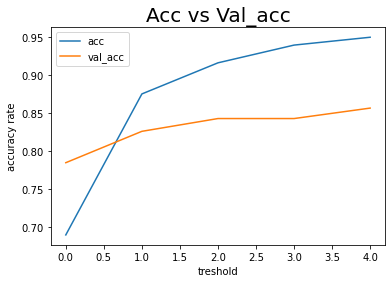

<Figure size 432x288 with 0 Axes>

In [73]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.ylabel('accuracy rate')
plt.xlabel('treshold')
plt.title('Acc vs Val_acc', size = 20)
plt.show()
plt.savefig("Accuracy plot.jpg")

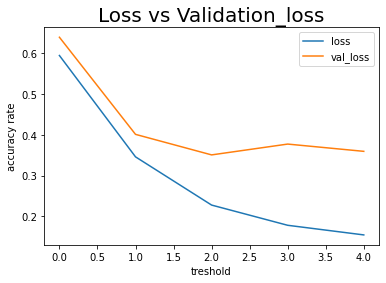

<Figure size 432x288 with 0 Axes>

In [74]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.ylabel('accuracy rate')
plt.xlabel('treshold')
plt.title('Loss vs Validation_loss', size = 20)
plt.show()
plt.savefig("Loss plot.jpg")

## Let’s execute sentiment analysis model

Define a function that takes a text as input and outputs its prediction label

In [75]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [76]:
test_sentence2 = "I enjoyed my journey on this flight."

test_sentence1 = "This is the worst flight experience of my life!, I would never recommend it to anyone"


In [77]:
predict_sentiment(test_sentence1)

1/1 [==============================] - 1s 657ms/step
Predicted label:  negative


In [78]:
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 44ms/step
Predicted label:  positive


# Conclusion

We have successfully developed python sentiment analysis model. In this machine learning project, we built a binary text classifier that classifies the sentiment of the tweets into positive and negative. We obtained more than 87% accuracy on validation.